In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from prophet import Prophet
from prophet.plot import plot_seasonality

from warnings import filterwarnings
filterwarnings('ignore')

c:\Users\John Rey Faciolan\Desktop\Work and Study\Software Projects\2025\NDVI-LST-Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("datasets/GROUP-14-VALUES_NDVI_LST.xlsx", sheet_name="DATASET", index_col="DATE")
df.fillna(method="ffill", inplace=True);

# Calculate the mean and standard deviation for LST and NDVI columns
mean_lst = df['LST'].mean()
std_lst = df['LST'].std()
mean_ndvi = df['NDVI'].mean()
std_ndvi = df['NDVI'].std()

# Define the upper and lower bounds for LST and NDVI
upper_bound_lst = mean_lst + 1.96 * std_lst
lower_bound_lst = mean_lst - 1.96 * std_lst
upper_bound_ndvi = mean_ndvi + 1.96 * std_ndvi
lower_bound_ndvi = mean_ndvi - 1.96 * std_ndvi

# Drop the outliers
df = df[(df['LST'] >= lower_bound_lst) & (df['LST'] <= upper_bound_lst)]
df = df[(df['NDVI'] >= lower_bound_ndvi) & (df['NDVI'] <= upper_bound_ndvi)]

df.index = pd.to_datetime(df.index)

## Facebook Prophet Model

The general idea of the model is similar to a generalized additive model. The “Prophet Equation” fits, as mentioned above, trends, seasonality, and holidays. This is given by,

$$
y(t) = g(t) + s(t) + h(t) + e(t)
$$

where:

- \( g(t) \) refers to **trend** (changes over a long period of time).  
- \( s(t) \) refers to **seasonality** (periodic or short-term changes).  
- \( h(t) \) refers to **effects of holidays** on the forecast.  
- \( e(t) \) refers to **unconditional changes** specific to a business, person, or circumstance. It is also called the **error term**.  
- \( y(t) \) is the **forecast**.


## Forecasting NDVI Using Facebook Prophet

In [3]:
# Prophet Model Forecasting
prophet_df = df["NDVI"].reset_index()
prophet_df.columns = ['ds', 'y']
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

16:16:04 - cmdstanpy - INFO - Chain [1] start processing
16:16:04 - cmdstanpy - INFO - Chain [1] done processing


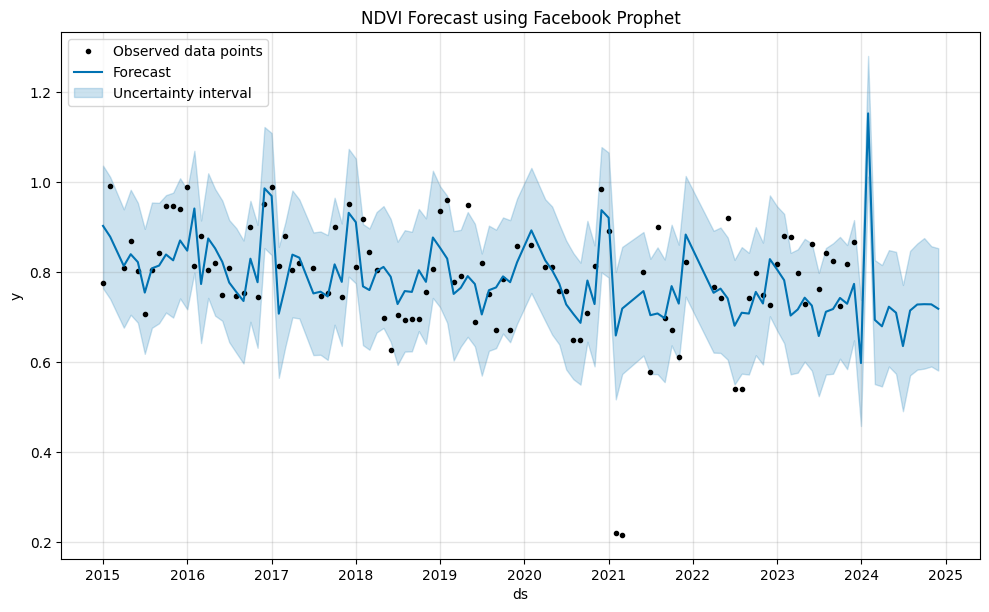

In [4]:
# Plot Prophet forecast
fig = model.plot(forecast, include_legend=True)
plt.title("NDVI Forecast using Facebook Prophet")
plt.show()

## Forecasting LST Using Facebook Prophet

In [5]:
# Prophet Model Forecasting
prophet_df = df["LST"].reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df.Name = "LST"
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

16:16:05 - cmdstanpy - INFO - Chain [1] start processing
16:16:05 - cmdstanpy - INFO - Chain [1] done processing


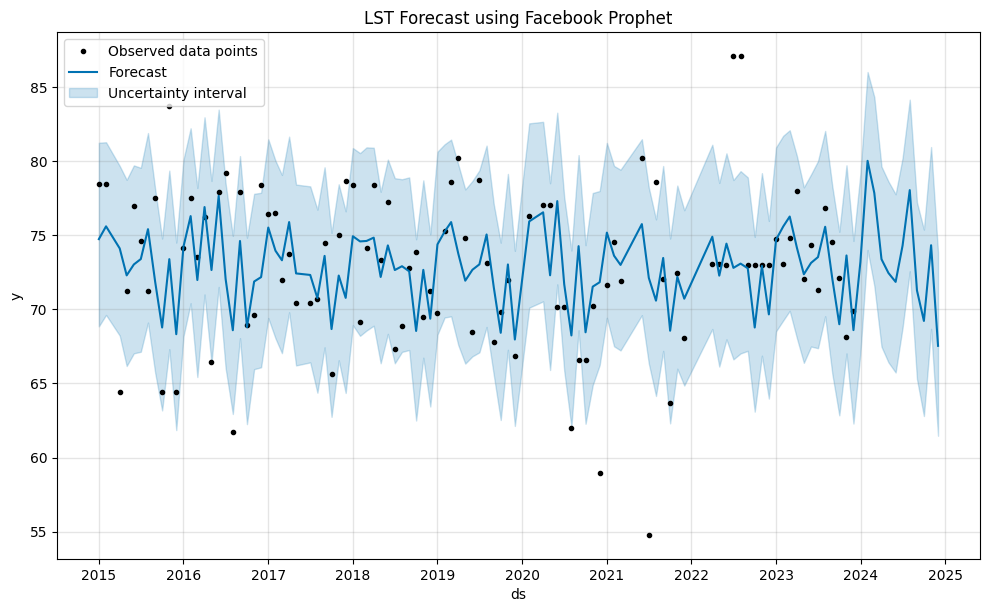

In [6]:
# Plot Prophet forecast
fig = model.plot(forecast, include_legend=True)
plt.title("LST Forecast using Facebook Prophet")
plt.show()